# **Важно!**

Домашнее задание состоит из нескольких задач, которые вам нужно решить.
*   Баллы выставляются по принципу выполнено/невыполнено.
*   За каждую выполненую задачу вы получаете баллы (количество баллов за задание указано в скобках).

**Инструкция выполнения:** Выполните задания в этом же ноутбуке (места под решения **КАЖДОЙ** задачи обозначены как **#НАЧАЛО ВАШЕГО РЕШЕНИЯ** и **#КОНЕЦ ВАШЕГО РЕШЕНИЯ**)

**Как отправить задание на проверку:** Вам необходимо сохранить ваше решение в данном блокноте и отправить итоговый **файл .IPYNB** на учебной платформе в **стандартную форму сдачи домашнего задания.**

**Срок проверки преподавателем:** домашнее задание проверяется **в течение 3 дней после дедлайна сдачи** с предоставлением обратной связи

# **Прежде чем проверять задания:**

1. Перезапустите **ядро (restart the kernel)**: в меню, выбрать **Ядро (Kernel)**
→ **Перезапустить (Restart)**
2. Затем **Выполнить** **все ячейки (run all cells)**: в меню, выбрать **Ячейка (Cell)**
→ **Запустить все (Run All)**.

После ячеек с заданием следуют ячейки с проверкой **с помощью assert.**

Если в коде есть ошибки, assert выведет уведомление об ошибке.

Если в коде нет ошибок, assert отработает без вывода дополнительной информации.

---

# Домашнее задание №4. Линейная классификация. Логистическая регрессия. Метод опорных векторов.

**Цели домашнего задания:** Решить проблемы бинарной классификации вручную. Решить многоклассовую классификацию на примере датасета рукописных цифр MNIST с помощью готовых библиотек. Реализовать метод опорных векторов.

In [ ]:
# Запустите эту ячейку для первоначальной настройки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rc('lines', linewidth=2)

## Часть 1. Реализация алгоритма линейной классификации для бинарных данных

В этой части, мы создадим синтетический набор бинарных данных и обучим модель вручную. Для этого нам неодходимо написать функцию сигмоиды, вычислить функцию потерь и её производную, чтобы использовать их во время градиентного спуска.

**Задание 1 (1 балл)**

Реализуйте функцию сигмоиды `sigmoid(z)`.

$$ S(z) = \frac{1}{1 + e^{-z}} $$

In [ ]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [ ]:
assert np.isclose(sigmoid(5), 1, atol=0.01)

**Задание 2 (1 балл)**

Реализуйте логистическую функцию потерь `compute_cost(y, y_pred)`.



$$ L(y, \hat{y}) = - \left[ y \log (\hat{y}) + (1 - y) \log (1 - \hat{y}) \right], $$

$$ где \quad y \quad — \quad истинная \quad метка \quad класса \quad (0 \quad или \quad 1), \quad \mathbf{X} \quad — \quad вектор \quad признаков, \quad w \quad — \quad веса \quad модели. $$


In [ ]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def compute_cost(y, y_pred):
    m = len(y)
    return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [ ]:
y_pred = np.array([0.1, 0.8, 0.4])
y = np.array([0, 1, 0])

assert np.isclose(compute_cost(y, y_pred), 0.28, atol=0.01)

**Задание 3 (1 балл)**

Реализуйте градиент логистической функции потерь `compute_gradient(X, y, w)`.

Градиент потерь по весам:

$$
\nabla_w L = \frac{1}{m} X^T (\hat{y} - y)
$$

Где:

- \( ${X}$ \) — матрица входных признаков (размер \( $m * n$ \)),
- \( ${w}$ \) — вектор весов (размер \( $n$ \)),
- \( ${y}$ \) — вектор истинных меток (размер \( $m$ \)),
- \( $\hat{y}$ \) — предсказанные значения.

In [ ]:
def compute_gradient(X, y, w):
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    m = len(y)
    y_pred = sigmoid(np.dot(X, w))
    gradient = np.dot(X.T, (y_pred - y)) / m
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return gradient

In [ ]:
X = np.array([[1, 2], [1, 3], [1, 4]])  # Пример данных с добавленным bias term
y = np.array([0, 1, 0])  # Метки классов
weights = np.array([0.1, -0.2])  # Начальные веса

assert np.allclose(compute_gradient(X, y, weights), [0.04, 0.10], atol=0.01)

**Задание 4 (1 балл)**

По аналогии с предыдущим домашним заданием, реализуйте функцию градиентного спуска.

In [ ]:
# Функция градиентного спуска
def gradient_descent(X, y, w, learning_rate, num_iterations):
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    for i in range(num_iterations):
        grad = compute_gradient(X, y, w)
        w = w - learning_rate * grad
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return w

In [ ]:
assert np.allclose(gradient_descent(X, y, weights, 0.03, 300), [-0.01, -0.22], atol=0.01)

In [ ]:
# Функция градиентного спуска
def gradient_descent_2(X, y, w, learning_rate, num_iterations):
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    loss_history = []

    for i in range(num_iterations):
        y_pred = sigmoid(np.dot(X, w))
        grad = compute_gradient(X, y, w)
        w = w - learning_rate * grad

        loss = compute_cost(y, y_pred)
        loss_history.append(loss)

        if i % 100 == 0:
            print(f"Итерация {i}: Потери = {loss:.10f}")

    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return w, loss_history
    # return w

In [ ]:
# gradient_descent(X, y, weights, 0.03, 300)

In [ ]:
assert np.allclose(gradient_descent_2(X, y, weights, 0.03, 300)[0], [-0.01, -0.22], atol=0.01)

Итерация 0: Потери = 0.6438727592
Итерация 100: Потери = 0.6408436541
Итерация 200: Потери = 0.6404881766


**Задание 5 (1 балл)**

Подготовьте синтетические бинарные данные с помощью команды из библиотеки `sklearn`. Используйте функцию `make_classification`. Создайте 200 точек с двумя признаками и двумя классами, без излишних признаков (`n_redundant=0`). Зафиксируйте `random_state=42`. Добавьте столбец единиц к данным для свободного члена.

(200, 2)


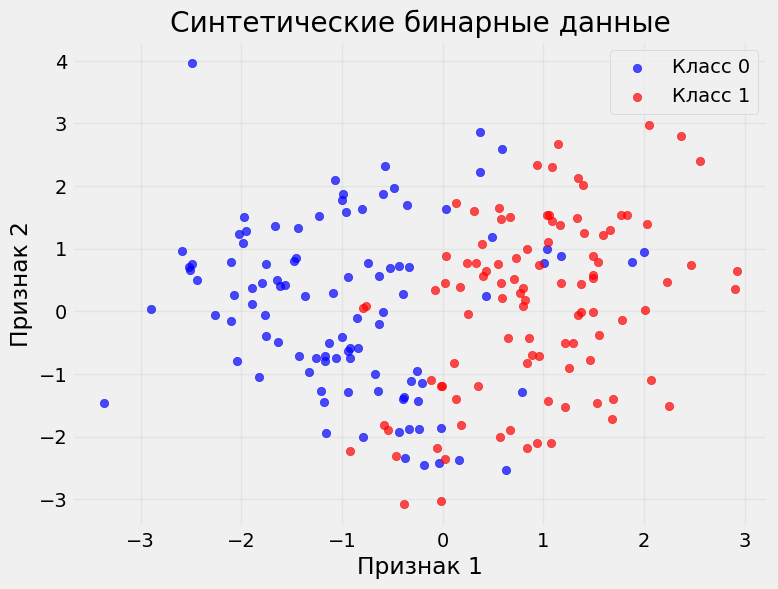

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
X, y = make_classification(n_samples=200, n_features=2, n_classes=2,
                           n_redundant=0, random_state=42)
print(X.shape)
# X = np.c_[np.ones(X.shape[0]), X]
# print(X.shape)
# print(X[:5])
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Класс 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Класс 1', alpha=0.7)
plt.title("Синтетические бинарные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Задание 6 (1 балл)**

Создайте новую переменную `X_ones`, добавив столбец единиц к данным для свободного члена с помощью `numpy` команды `concatenate`. Разбейте данные на тренировочную и тестовую выборки, выделив 20% данных под тестирование. Инициализируйте веса `weights` случайным образом.

In [ ]:
from sklearn.model_selection import train_test_split
# Не удаляйте и не меняйте seed
np.random.seed(21)

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
X_ones = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
# print(X_ones)
X_train, X_test, y_train, y_test = train_test_split(X_ones, y, test_size=0.2)
weights = np.random.randn(X_train.shape[1])

print("Размер X_train:", X_train.shape)
print("Размер X_test:", X_test.shape)
print("Размер y_train:", y_train.shape)
print("Размер y_test:", y_test.shape)
print("Инициализированные веса:", weights)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

Размер X_train: (160, 3)
Размер X_test: (40, 3)
Размер y_train: (160,)
Размер y_test: (40,)
Инициализированные веса: [-0.60789276  0.75986478 -1.04128826]


In [ ]:
assert X_ones.shape[1]==3 and X_ones.shape[0]==200
assert weights.shape[0]==3

**Задание 7 (1 балл)**

Обучите модель и предскажите значения для тестовой выборки. Вычислите значение функции потерь для тестовой выборки, `test_cost`.

*Hint!* Не забудьте сигмоиду ;)

In [ ]:
weights = gradient_descent(X_train, y_train, weights, learning_rate=0.03, num_iterations=300)
weights,_ = gradient_descent_2(X_train, y_train, weights, learning_rate=0.03, num_iterations=300)
y_pred_test = sigmoid(np.dot(X_test, weights))
test_cost = compute_cost(y_test, y_pred_test)

Итерация 0: Потери = 0.3652461158
Итерация 100: Потери = 0.3613913441
Итерация 200: Потери = 0.3593775770


In [ ]:
assert np.isclose(test_cost, 0.3, atol=0.01)

## Часть 2. Реализация алгоритма бинарной классификации sklearn. Сравнение результатов.

**Задание 8 (1 балл)**

Реализуйте обучение на тех же данных с помощью готовой функции `LogisticRegression` из `sklearn.linear_model`. Предскажите вероятности для тестовой выборки с помощью метода `predict_proba` и оцените качество обучения при помощи `log_loss` из `sklearn.metrics`. Запишите значение функции потерь в переменную `cost_sklearn`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_proba = model_lr.predict_proba(X_test)

cost_sklearn = log_loss(y_test, y_pred_proba)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [ ]:
assert np.isclose(cost_sklearn, 0.3, atol=0.01)

Обратите внимание, что мы получили схожие значения функций потерь обоими методами.
Теперь мы можем перейти к многоклассовой классификации.

## Часть 3. Реализация алгоритма многоклассовой классификации на примере данных `digits`.



Теперь, когда мы разобрались с тем, как работает обучение модели бинарной классификации, мы можем перейти к проблеме многих классов. В качестве примера, рассмотрим задачу классификации рукописных цифр из классического набора данных `digits`. Первым шагом необходимо загрузить данные. Мы будем использовать функцию `load_digits` из модуля `sklearn.datasets`, которая загрузит набор данных `digits` с цифрами от 0 до 9.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data # изображения, преобразованные из матрицы (8, 8) в вектор (64,)
y = digits.target

Для визуализации цифр из набора данных, загруженного с помощью библиотеки scikit-learn, можно использовать функцию `imshow() `библиотеки Matplotlib.

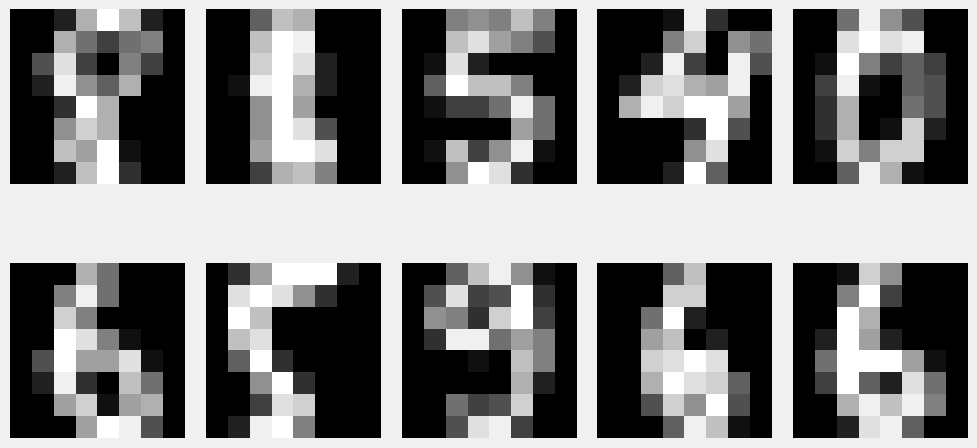

In [ ]:
# Визуализация нескольких случайных изображений цифр
indices = np.random.choice(len(X), 10, replace=False)
random_digits = X[indices]

# Создаём сетку 5x2 для отображения изображений
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

# Строим картинки в каждой ячейке сетки
for i, ax in enumerate(axes.flat):
    ax.imshow(random_digits[i].reshape((8,8)), cmap='gray')
    ax.axis('off')  # Убираем оси

# Эта команда помогает избегать наложений объектов графика
plt.tight_layout()
plt.show()

Как обычно, необходимо разделить данные на обучающую и тестовую выборки:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

**Задание 9 (1 балл)**

Создайте по экземпляру класса `LogisticRegression` (`sklearn.linear_model`) и `SVC` (`sklearn.svm`). Внимательно почитайте официальную [документацию OneVsRestClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsRestClassifier.html), обратите внимание на то, какие аргументы принимает этот класс. Назовите их `softmax_model` и `ovr_model`, соответственно. Обучите обе модели на данных MNIST. Сделайте предсказания для тестовой выборки.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

np.random.seed(21)

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
softmax_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
softmax_model.fit(X_train, y_train)
y_pred_sm = softmax_model.predict(X_test)


svm_model = SVC(decision_function_shape="ovr",  max_iter=1000)
svm_model.fit(X_train, y_train)
y_pred_ovr = svm_model.predict(X_test)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
assert type(softmax_model) == LogisticRegression and softmax_model.max_iter == 1000
assert type(svm_model) == SVC and svm_model.max_iter == 1000

**Задание 10 (1 балл)**

Вычислите и сравните основные метрики классификации. Для вычисления `precision`, `recall` и `F1-score` воспользуйтесь готовыми метриками из библиотки `sklearn.metrics` (найдите названия нужных функций самостоятельно). Укажите аргумент `average='macro'` для вычисления метрик усреднённых по категориям. Сохраните значения метрик в переменные:

* `softmax_accuracy_score`
* `softmax_precision_score`
* `softmax_recall_score`
* `softmax_f1_score`


* `svm_accuracy_score`
* `svm_precision_score`
* `svm_recall_score`
* `svm_f1_score`



In [ ]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

softmax_accuracy_score = accuracy_score(y_test, y_pred_sm)
softmax_precision_score = precision_score(y_test, y_pred_sm, average="macro")
softmax_recall_score = recall_score(y_test, y_pred_sm, average="macro")
softmax_f1_score = f1_score(y_test, y_pred_sm, average="macro")

svm_accuracy_score = accuracy_score(y_test, y_pred_ovr)
svm_precision_score = precision_score(y_test, y_pred_ovr, average="macro")
svm_recall_score = recall_score(y_test, y_pred_ovr, average="macro")
svm_f1_score = f1_score(y_test, y_pred_ovr, average="macro")
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [ ]:
# Качество по всем метрикам должно быть выше 95%
print(f"softmax_accuracy_score: {softmax_accuracy_score}")
print(f"softmax_precision_score: {softmax_precision_score}")
print(f"softmax_recall_score: {softmax_recall_score}")
print(f"softmax_f1_score: {softmax_f1_score}")

print(f"svm_accuracy_score: {svm_accuracy_score}")
print(f"svm_precision_score: {svm_precision_score}")
print(f"svm_recall_score: {svm_recall_score}")
print(f"svm_f1_score: {svm_f1_score}")

softmax_accuracy_score: 0.975
softmax_precision_score: 0.9755891749496401
softmax_recall_score: 0.975590939649223
softmax_f1_score: 0.9753951883808829
svm_accuracy_score: 0.9861111111111112
svm_precision_score: 0.987139855110248
svm_recall_score: 0.9852165435139574
svm_f1_score: 0.9859103789515758


In [ ]:
assert softmax_accuracy_score > 0.95
assert softmax_precision_score > 0.95
assert softmax_recall_score > 0.95
assert softmax_f1_score > 0.95

assert svm_accuracy_score > 0.95
assert svm_precision_score > 0.95
assert svm_recall_score > 0.95
assert svm_f1_score > 0.95

# Поздравляем!
В этом домашнем задании вы вручную реализовали алгоритм логистической регрессии с помощью градиентного спуска. Вы углубили навыки пользования библиотекой `sklearn` для обучения моделей, создания синтетических данных и вычисления метрик оценки качества моделей.